# Worm Hole

![title](worm_hole_pic.png)

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# House Keeping

In [2]:
# Set seed
np.random.seed(802)

# Grid size
grid_rows = 7
grid_cols = 23

# Locations
start = [0, 0]
goal = [6, 22]
black_hole_cols = [7, 15]
worm_hole_1 = [6, 3]
worm_hole_2 = [6, 11]
worm_hole_3 = [0, 11]
worm_hole_4 = [0, 19]

# Action set 0=Up 1=Down 2=Left 3=Right
actions = range(4)

# Reward at Each Step
reward = -1

# Step Size
alpha = 0.5

# Exploration Rate
epsilon = 0.1

# Set number of episodes to run
episodes = 500

# Step Function

In [3]:
def step(state, action):
    
    rownum, colnum = state
    reward = -1
    
    # 0=Up
    if action==0:
        rownum = max( rownum -1, 0 )
    
    # 1=Down
    elif action==1:
        rownum = min( rownum +1, grid_rows-1 )
    
    # 2=Left
    elif action==2:
        colnum = max( colnum -1, 0 )
    
    # 3=Right
    else:
        colnum = min( colnum +1, grid_cols-1 )
    
    # Worm Hole 1 Forward
    if ( rownum==worm_hole_1[0] ) & ( colnum==worm_hole_1[1] ):
        rownum = worm_hole_2[0] - 1
        colnum = worm_hole_2[1]
        
    # Worm Hole 2 Backward
    if ( rownum==worm_hole_2[0] ) & ( colnum==worm_hole_2[1] ):
        rownum = worm_hole_1[0] - 1
        colnum = worm_hole_1[1]
        
    # Worm Hole 3 Forward
    if ( rownum==worm_hole_3[0] ) & ( colnum==worm_hole_3[1] ):
        rownum = worm_hole_4[0] + 1
        colnum = worm_hole_4[1]
        
    # Worm Hole 4 Backward
    if ( rownum==worm_hole_4[0] ) & ( colnum==worm_hole_4[1] ):
        rownum = worm_hole_3[0] + 1
        colnum = worm_hole_3[1]
    
    # Restart Position if Agent Moves into Black Hole
    if colnum in black_hole_cols:
        rownum = start[0]
        colnum = start[1]
        reward = -100
        
    return [rownum, colnum, reward]

# Greedy Action Function

In [4]:
def greedy(state, q_table, epsilon):
    
    # Randomly select action with probability epsilon
    if np.random.uniform() < epsilon:
        g_action = np.random.choice(actions)
        
    # Select the best action for the given state with probability 1-epsilon
    else:
        q_vals = q_table[state[0], state[1], :]
        q_vals_max = np.where(q_vals==q_vals.max())[0]
        g_action = np.random.choice(q_vals_max)
    
    return g_action

# Q-Learning

In [5]:
# Initialize Q-Table
q_table = np.zeros([grid_rows, grid_cols, len(actions)])

# Store the steps to reach the goal for each episode
steps_vec = []
reward_vec = []

# Q-Learning
for i in range(episodes):
    
    # Count steps and sum total reward per episode
    steps_count = 0
    reward_total = 0
    
    # Always start in the same position
    state = start
    
    # Loop until the goal is reached
    while state!=goal:
        
        # Choose action based on epsilon-greedy
        action = greedy(state, q_table, epsilon)
        
        # Find next state and reward given current state and action
        new_s_r = step(state, action)
        new_state = new_s_r[:2]
        reward = new_s_r[2]
        
        # Update the q-table with Q-Learning
        q_table[state[0],state[1],action] = q_table[state[0],state[1],action] + \
            alpha * ( reward + max(q_table[new_state[0],new_state[1],]) - \
                q_table[state[0],state[1],action] )
        
        # Set new state to current state
        state = new_state
        
        # Update steps count and reward total
        steps_count += 1
        reward_total += reward
        
    # Save steps and total reward per episode
    steps_vec.append(steps_count)
    reward_vec.append(reward_total)

# View Results

In [6]:
min_steps = 22
optimal_path_count = sum(np.array(steps_vec)==min_steps)
print("The agent followed the optimal path", 100*optimal_path_count/episodes, "% of the time.")

The agent followed the optimal path 14.8 % of the time.


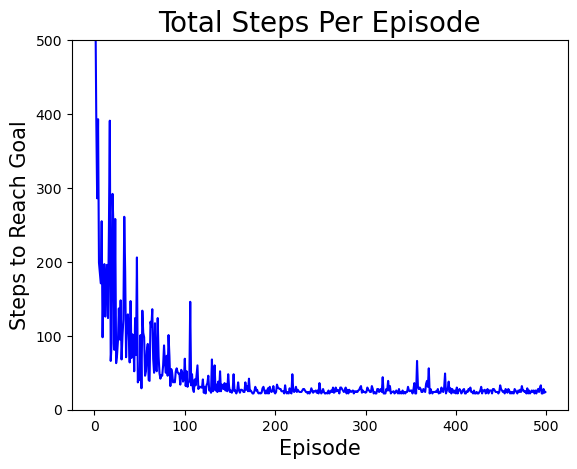

In [7]:
plt.plot(steps_vec, color="blue")
plt.title("Total Steps Per Episode", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Steps to Reach Goal", fontsize=15)
plt.ylim(0,500)
plt.show()

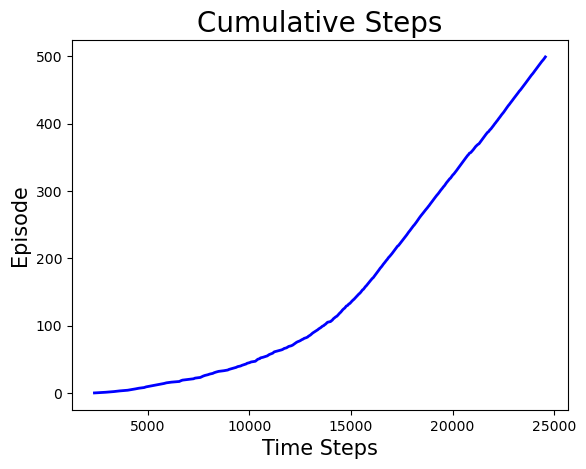

In [8]:
plt.plot(np.cumsum(steps_vec), range(episodes), color="blue", lw=2)
plt.title("Cumulative Steps", fontsize=20)
plt.xlabel("Time Steps", fontsize=15)
plt.ylabel("Episode", fontsize=15)
plt.show()

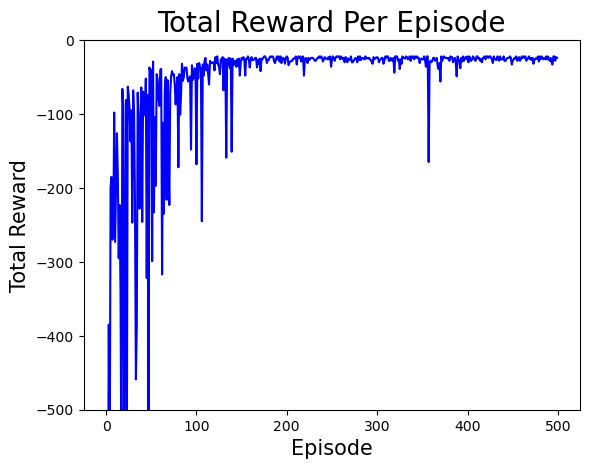

In [9]:
plt.plot(reward_vec, color="blue")
plt.title("Total Reward Per Episode", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Total Reward", fontsize=15)
plt.ylim(-500,0)
plt.show()

# Optimal Path

In [10]:
# Find the Greedy Path
my_path = []
state = start
while state!=goal:
    q_vals = q_table[state[0], state[1], :]
    q_vals_max = np.where(q_vals==q_vals.max())[0]
    g_action = np.random.choice(q_vals_max)

    rownum, colnum, rew = step(state, g_action)
    state = [rownum, colnum]
    my_path.append(state)
    
my_path = my_path[:-1]

# Specify Grid Locations
grid = np.full((grid_rows, grid_cols), "-")
grid[start[0],start[1]] = "S"
grid[goal[0],goal[1]] = "G"

for i in range(grid_rows):
    grid[i,black_hole_cols[0]] = "B"

for i in range(grid_rows):
    grid[i,black_hole_cols[1]] = "B"
    
grid[worm_hole_1[0],worm_hole_1[1]] = "W"
grid[worm_hole_2[0],worm_hole_2[1]] = "W"
grid[worm_hole_3[0],worm_hole_3[1]] = "W"
grid[worm_hole_4[0],worm_hole_4[1]] = "W"

# Specify Agent Locations
for i in range(len(my_path)):
    grid[my_path[i][0], my_path[i][1]] = "A"
    
print(grid.T)

[['S' '-' '-' '-' '-' '-' '-']
 ['A' '-' '-' '-' '-' '-' '-']
 ['A' 'A' 'A' 'A' '-' '-' '-']
 ['-' '-' '-' 'A' 'A' 'A' 'W']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['B' 'B' 'B' 'B' 'B' 'B' 'B']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['W' 'A' 'A' 'A' 'A' 'A' 'W']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['B' 'B' 'B' 'B' 'B' 'B' 'B']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-']
 ['W' 'A' '-' '-' '-' '-' '-']
 ['-' 'A' '-' '-' '-' '-' '-']
 ['-' 'A' 'A' 'A' 'A' 'A' 'A']
 ['-' '-' '-' '-' '-' '-' 'G']]
